In [1]:
import numpy as np
from numpy import ndarray
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import random

from typing import List
from itertools import product

In [2]:
GOAL = np.array([0, 0])
MIN_OBS = 5.0
MIN_GOAL = 5.0
OBS = np.random.randint(-200, 200, (15, 2))

In [3]:
OBS

array([[ 183,   25],
       [ 164,  156],
       [-160,   16],
       [ 127,  -54],
       [  52,  113],
       [  72,    9],
       [-200, -156],
       [ -36, -194],
       [ -88, -144],
       [ -13, -150],
       [  58,  102],
       [ -14,   10],
       [-150,  171],
       [  -1,  -69],
       [ 150,   35]])

In [4]:
def distance_goal(position: ndarray) -> float:
    distance: float = get_horizontal_distance(position, GOAL)

    return distance

def get_horizontal_distance(p1: ndarray, p2: ndarray) -> float:
    return ((p1[0] - p2[0]) ** 2 +
            (p1[1] - p2[1]) ** 2) ** 0.5

def distance_to_obstacle(position: ndarray):
    return min([get_horizontal_distance(position, o) for o in OBS])

def reward(position: ndarray):
    dist_obs = distance_to_obstacle(position)
    dist_goal = distance_goal(position)
    
    return -dist_goal + 50 * np.exp(-MIN_OBS / dist_obs)

In [5]:
%matplotlib notebook

In [9]:
x = y = np.arange(-300.0, 300.0, 5.0)
X, Y = np.meshgrid(x, y)
zs = np.array([reward([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

/home/abdu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


<IPython.core.display.Javascript object>


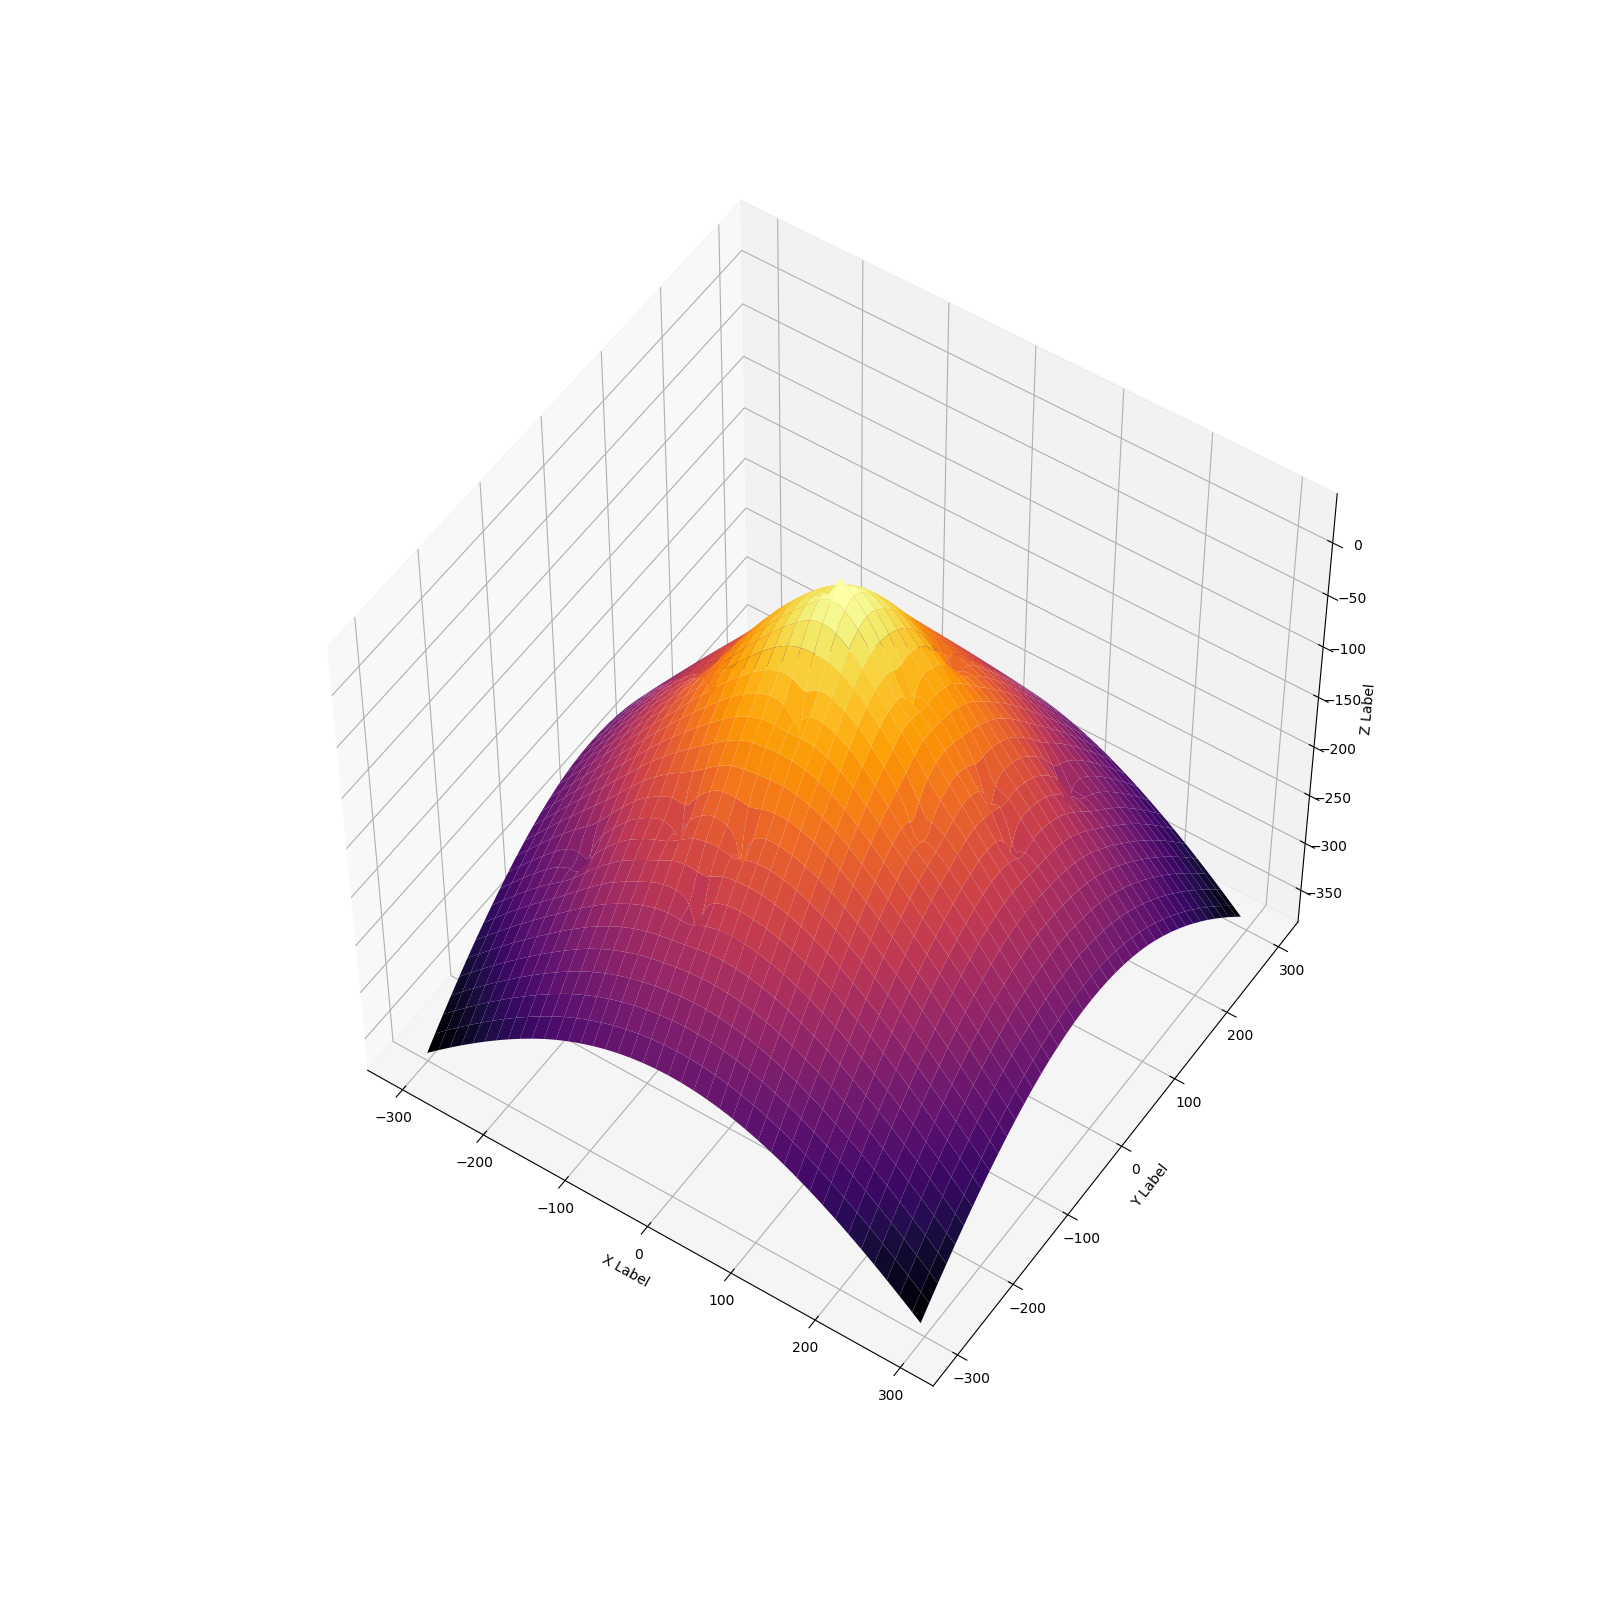

In [7]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.inferno)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


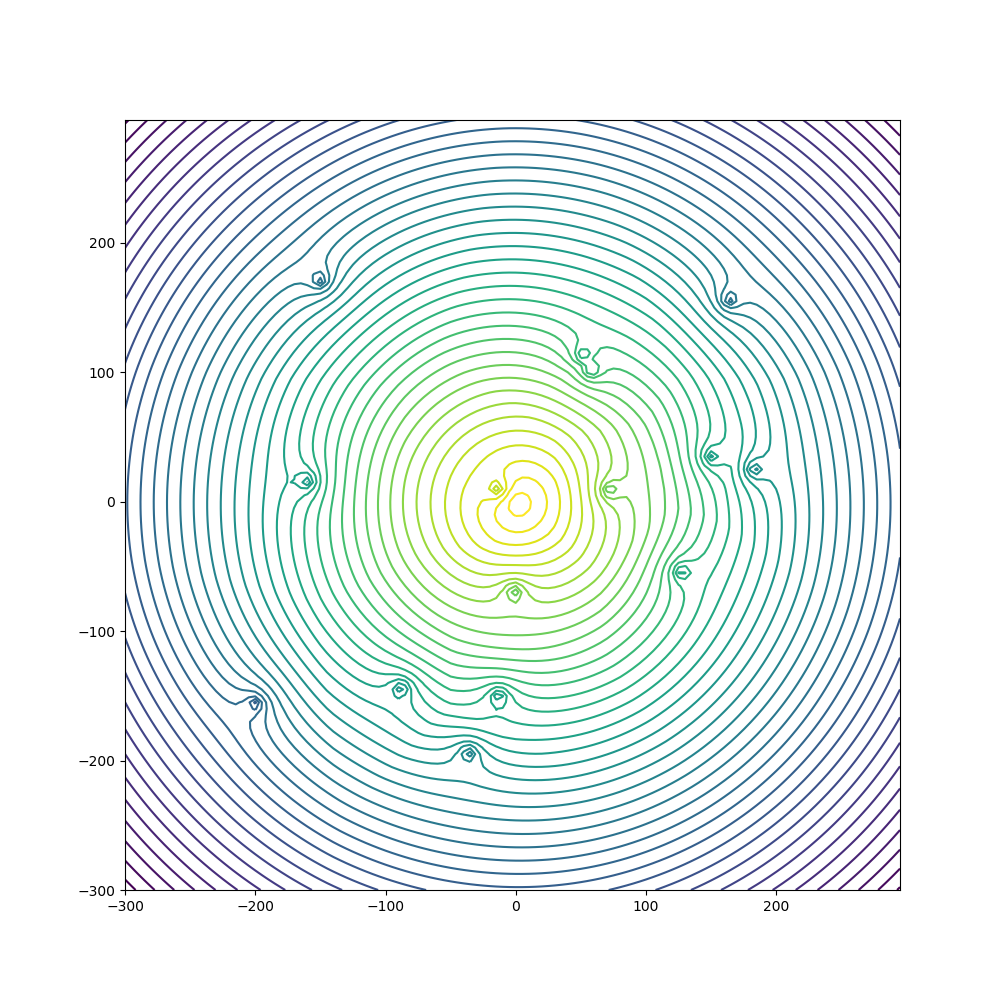

In [8]:
fig = plt.figure(figsize=(10, 10))
CS = plt.contour(X,Y,Z, 50)
#plt.clabel(CS,inline=True)
plt.show()